In [2]:
import pandas as pd
import numpy as np

# import models here 
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
#setting up random seed for project requirements 
np.random.seed(73)


In [3]:
#reading in final dataset from EDA 
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'level_0', 'transaction_date', 'ticker',
       'asset_description', 'type', 'amount', 'representative', 'timestamp',
       'merge_key', 'people', 'state', 'party_x', 'total_senate_years',
       'total_house_years', 'total_years', 'donation_merge_key', 'name',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'party_y', 'start', 'day_30',
       'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff', 'day_90',
       'day_90_stock_perc_diff', 'day_180', 'day_180_stock_perc_diff',
       'sp_start', 'sp_30', 'sp_30_sp_perc_diff', 'sp_60',
       'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff'],
      dtype='object')

In [14]:
values = df.groupby('representative')['day_180', 'sp_180'].mean().sort_values('day_180')

<ipython-input-14-d8b0c20ca58f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  values = df.groupby('representative')['day_180', 'sp_180'].mean().sort_values('day_180')


In [21]:
values.day_180[:5].values

array([ 0.05      ,  6.51800003,  9.75      , 10.22999954, 12.26000023])

In [36]:
df['total_raised'] =[int(raised.replace('$','')) for raised in df['total_raised']]

In [37]:
df['percent_from_small_donors*'] = [float(pct.replace('%','')) for pct in df['percent_from_small_donors*']]

In [38]:
df['percent_from_small_donors*']

0         6.00
1         6.00
2         6.00
3         6.00
4         6.00
         ...  
10076    19.55
10077    19.55
10078    19.55
10079    19.55
10080    19.55
Name: percent_from_small_donors*, Length: 10081, dtype: float64

In [39]:
df['type'].value_counts()

purchase        5101
sale_full       2804
sale_partial    2088
exchange          88
Name: type, dtype: int64

In [40]:
beats_sp = []
for i, row in df.iterrows():
    if row['day_180_stock_perc_diff'] > row['sp_180_sp_perc_diff']:
        beats_sp.append(1)
    else:
        beats_sp.append(0)
df['beats_sp'] = beats_sp

In [41]:
df = df.loc[df['type'] == 'purchase']

In [42]:
df['beats_sp'].mean()

0.46324250147029994

In [43]:
df.columns

Index(['Unnamed: 0', 'level_0', 'transaction_date', 'ticker',
       'asset_description', 'type', 'amount', 'representative', 'timestamp',
       'merge_key', 'people', 'state', 'party_x', 'total_senate_years',
       'total_house_years', 'total_years', 'donation_merge_key', 'name',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'party_y', 'start', 'day_30',
       'day_30_stock_perc_diff', 'day_60', 'day_60_stock_perc_diff', 'day_90',
       'day_90_stock_perc_diff', 'day_180', 'day_180_stock_perc_diff',
       'sp_start', 'sp_30', 'sp_30_sp_perc_diff', 'sp_60',
       'sp_60_sp_perc_diff', 'sp_90', 'sp_90_sp_perc_diff', 'sp_180',
       'sp_180_sp_perc_diff', 'beats_sp'],
      dtype='object')

In [95]:
Features = ['party_x', 'ticker', 'total_years', 'total_raised', 'percent_from_small_donors*']
X = df[Features]
y = df['beats_sp']

X = pd.get_dummies(X, columns = ['party_x', 'ticker'], drop_first = True)

In [96]:
X['total_raised'].unique()

array([  4748019,   5695157,   2182985,    352725,   1813365,   1534882,
         1092609,   1336576,    874311,    678648,    736116,    540712,
         -561303,   2328616,    847320,   3384490,   4370133,    410261,
         1755555,   6128177,    658295,   1008847,   2018692,   4794213,
         1194960,   1024912,   1729482,   2338195,   1166754,   7694027,
         1405738,    791888,    103492,   1094104,   9962507,   1858388,
         1161738,   1228970,   1202509,  27359508,    964731,    942386,
         1632262,    655365,   3321170,    759908,   6419707,  10430712,
        19427865,   1788706,    884651,   2549667,   1580952,    129584,
         1630498,   2105736,    977784,    454043,   2944893,    821745,
         6609476,    192137,   3842907,   3616380,    869210,   5968858,
         4975192,   1001120,    934102,   4437791,  12071622,  71351350,
        28093267,   6452506,  11304150,   5749615,  92135745, 102253913,
         7024927,  10472845,   6598997,   4020075, 

In [97]:
X.isna().sum()

total_years                   0
total_raised                  0
percent_from_small_donors*    0
party_x_Independent           0
party_x_Libertarian           0
                             ..
ticker_ZION                   0
ticker_ZM                     0
ticker_ZNGA                   0
ticker_ZTS                    0
ticker_ZUO                    0
Length: 1186, dtype: int64

In [98]:
# train test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [100]:
pipe = Pipeline([
    ('logreg', LogisticRegression())
])

params = {'logreg__C':[ .1], 
#          'logreg__solver': ['saga'],
#          'logreg__penalty': ['l1', 'l2']
         }


gs = GridSearchCV(pipe, params, cv = 5, verbose = 1)

gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('logreg', LogisticRegression())]),
             param_grid={'logreg__C': [0.1]}, verbose=1)

In [101]:
gs.best_score_

0.6436601307189542

In [102]:
gs.best_params_

{'logreg__C': 0.1}

In [103]:
#checking variance and bias

print('Training Score:', gs.score(X_train_sc, y_train))
print('Testing Score:', gs.score(X_test_sc, y_test))

Training Score: 0.7749019607843137
Testing Score: 0.6371473354231975


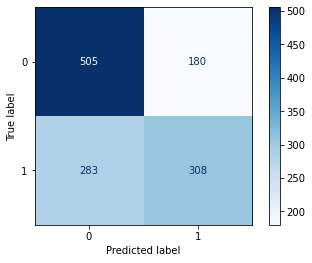

In [104]:
plot_confusion_matrix(gs, X_test_sc, y_test, cmap='Blues', 
                      values_format='d');

In [132]:
Features = ['party_x', 'ticker', 'total_house_years','total_senate_years', 'total_raised', 'percent_from_small_donors*']
X = df[Features]
y = df['day_180_stock_perc_diff']

X = pd.get_dummies(X, columns = ['party_x', 'ticker'], drop_first = True)

In [133]:
y

1        0.254
2        0.380
16       0.084
17      -0.065
18      -0.118
         ...  
10072    0.038
10073    0.159
10074    0.214
10078    0.272
10079   -0.082
Name: day_180_stock_perc_diff, Length: 5101, dtype: float64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [135]:
ridge = Ridge()

ridge.fit(X_train_sc, y_train)

Ridge()

In [136]:
print('Training Score:', ridge.score(X_train_sc, y_train))
print('Testing Score:', ridge.score(X_test_sc, y_test))

Training Score: 0.6232794463380655
Testing Score: 0.3571042973687232


In [138]:
coef_df = pd.DataFrame({'Features':X.columns, 'coefs': ridge.coef_})

In [144]:
coef_df.sort_values('coefs')

,Features,coefs
2,total_raised,-0.040132
724,ticker_NGL,-0.033452
793,ticker_PASO,-0.030406
1,total_senate_years,-0.027544
458,ticker_GLOP,-0.019206
...,...,...
935,ticker_SI,0.033819
130,ticker_BE,0.035959
131,ticker_BEEM,0.036448
392,ticker_FCEL,0.098981
